In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
path = 'Churn_Modelling.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Univariate Analysis

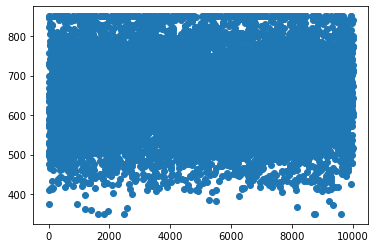

In [4]:
plt.scatter(df.index,df['CreditScore'])
plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='CreditScore', ylabel='count'>

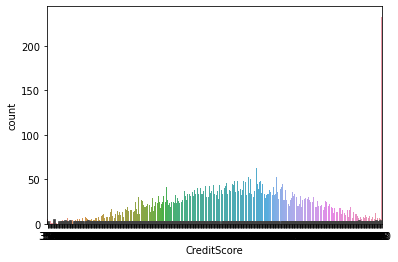

In [20]:
sns.barplot(x='CreditScore',y='NumOfProducts',data=df)
sns.countplot(x='CreditScore',data=df)

# Multivariate Analysis

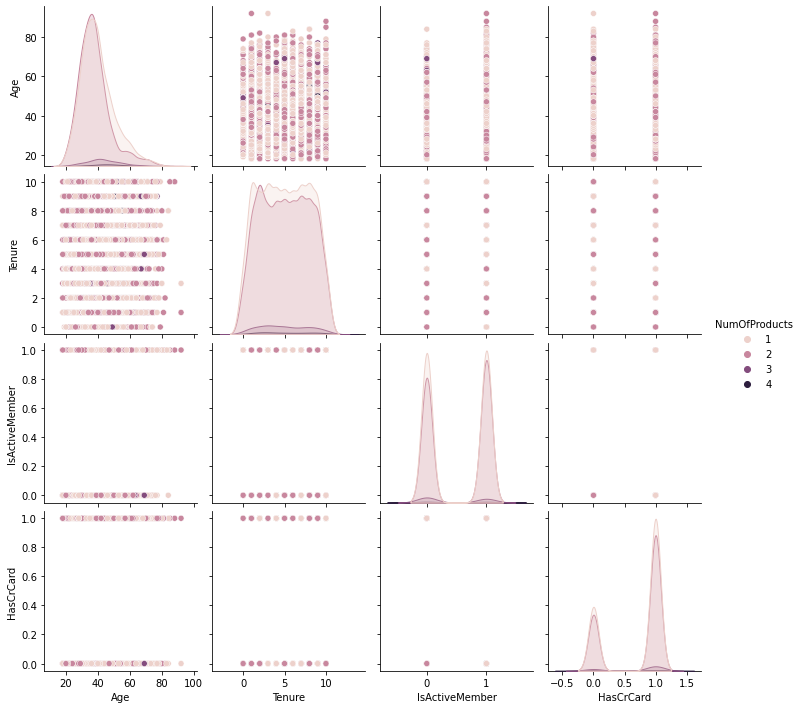

In [10]:
sns.pairplot(data=df[["Age","NumOfProducts","Tenure","IsActiveMember","HasCrCard"]],hue="NumOfProducts")

# Descriptive statistics on the dataset

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Handle the missing values

In [6]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
df.fillna(0)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df["Gender"].fillna("No Gender",inplace = True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Finding the outliers and remove the outliers

<AxesSubplot:xlabel='CreditScore'>

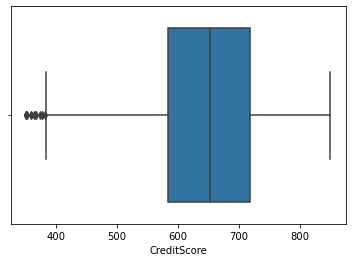

In [11]:
sns.boxplot(x = df['CreditScore'])

In [13]:
print(np.where(df['CreditScore']<600))

(array([   2,    7,    8, ..., 9981, 9991, 9996], dtype=int64),)


In [14]:
Q1= np.percentile(df['CreditScore'],25, interpolation = 'midpoint')
Q3= np.percentile(df['CreditScore'],75, interpolation = 'midpoint')
IQR = Q3 - Q1
print (IQR)

134.0


In [16]:
Q1 = df['CreditScore'].quantile(0.25)
Q3= df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['CreditScore']=np.where(df['CreditScore']>upper_whisker,upper_whisker,np.where(df['CreditScore']<lower_whisker,lower_whisker,df['CreditScore']))

<AxesSubplot:xlabel='CreditScore'>

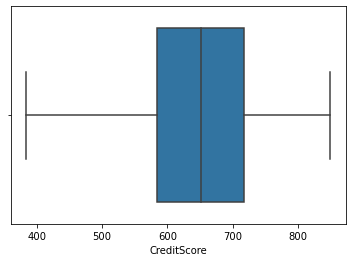

In [18]:
sns.boxplot(x = df['CreditScore'], data=df)

# Check for Categorical columns and perform encoding

In [19]:
df_categorical = df[['Gender', 'Geography', 'HasCrCard', 'IsActiveMember', 'Exited']]
df_categorical.head()

,Gender,Geography,HasCrCard,IsActiveMember,Exited
0,Female,France,1,1,1
1,Female,Spain,0,1,0
2,Female,France,1,0,1
3,Female,France,0,0,0
4,Female,Spain,1,1,0


In [20]:
from sklearn.preprocessing import LabelEncoder

df_encoder = LabelEncoder()

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Geography"] = le.fit_transform(df["Geography"])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0


# Split the data into dependent and independent variables.

In [22]:
y = df["Surname"]
x=df.drop(columns=["Surname"],axis=1)
x.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0


# Scale the independent variables

In [23]:
x

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771.0,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516.0,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709.0,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772.0,1,1,42,3,75075.31,2,1,0,92888.52,1


In [24]:
from sklearn.preprocessing import scale
X=scale(x)
X

array([[-1.73187761, -0.78321342, -0.32687761, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-1.7315312 , -0.60653412, -0.44080365, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.73118479, -0.99588476, -1.53863634, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 1.73118479, -1.47928179,  0.60524449, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.7315312 , -0.11935577,  1.25772996, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.73187761, -0.87055909,  1.4648682 , ..., -1.03067011,
        -1.07636976, -0.50577476]])

# Split the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.head(5))
print(x_test.head(5))
print(y_train.head(5))
print(y_test.head(5))

      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
7389       7390    15676909        667.0          2       0   34       5   
9275       9276    15749265        427.0          1       1   42       1   
2995       2996    15582492        535.0          0       0   29       2   
5316       5317    15780386        654.0          2       1   40       5   
356         357    15611759        850.0          2       0   57       8   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
7389       0.00              2          1               0        163830.64   
9275   75681.52              1          1               1         57098.00   
2995  112367.34              1          1               0        185630.76   
5316  105683.63              1          1               0        173617.09   
356   126776.30              2          1               1        132298.49   

      Exited  
7389       0  
9275       0  
2995       0  
5316       0  